In [1]:
# imports
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import scipy.io
import scipy.stats as stats

c:\Users\jeffr\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
os.chdir('c:/sri_lab/conditions/ADHD_A_matrices/')
path = os.listdir('c:/sri_lab/conditions/ADHD_A_matrices/')
ADHD_names = []
ADHD_files = []
for file in path:
    tmp = scipy.io.loadmat(file)
    val = tmp.get('patient_code')
    ADHD_names.append(val[0][0:12])
    ADHD_files.append(val[0][:])

os.chdir('c:/sri_lab/conditions/Control_A_matrices/')
path = os.listdir('c:/sri_lab/conditions/Control_A_matrices/')
Control_names = []
Control_files = []
for file in path:
    tmp = scipy.io.loadmat(file)
    val = tmp.get('patient_code')
    Control_names.append(val[0][0:12])
    Control_files.append(val[0][:])

c:\Users\jeffr\anaconda3\lib\site-packages\scipy\io\matlab\_mio.py:226: MatReadWarning: Duplicate variable name "None" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)


In [3]:
# get patient data into array

particpant_data = pd.read_excel('c:/sri_lab/TDBRAIN-sample_info/TDBRAIN_participants_V2.xlsx')

#subset ADHD participants

df_ADHD = particpant_data[particpant_data['participants_ID'].isin(ADHD_names)]

df_ADHD = df_ADHD.drop_duplicates(subset = 'participants_ID', keep = 'first')

#subset Control particpants

df_Control = particpant_data[particpant_data['participants_ID'].isin(Control_names)]

df_Control = df_Control.drop_duplicates(subset = 'participants_ID', keep = 'first')


particpant_data['gender']


0       0
1       1
2       1
3       1
4       1
       ..
1342    1
1343    0
1344    1
1345    1
1346    1
Name: gender, Length: 1347, dtype: int64

In [4]:
# Create pvalue arrays to plot for ADHD and Control

ADHD_pvals = []
Control_pvals = []

os.chdir('c:/sri_lab/conditions/ADHD_A_matrices/')

path = os.listdir('c:/sri_lab/conditions/ADHD_A_matrices/')
for file in path:
    tmp = scipy.io.loadmat(file)
    val = tmp.get('pvalue')
    ADHD_pvals.append(val[0][0])


os.chdir('c:/sri_lab/conditions/Control_A_matrices/')
path = os.listdir('c:/sri_lab/conditions/Control_A_matrices/')
for file in path:
    tmp = scipy.io.loadmat(file)
    val = tmp.get('pvalue')
    Control_pvals.append(val[0][0])

print("Mean ADHD p-value:", np.mean(ADHD_pvals))
print("Mean Control p-value:", np.mean(Control_pvals))

c:\Users\jeffr\anaconda3\lib\site-packages\scipy\io\matlab\_mio.py:226: MatReadWarning: Duplicate variable name "None" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)


Mean ADHD p-value: 0.02228590166559275
Mean Control p-value: 0.15608832710874768


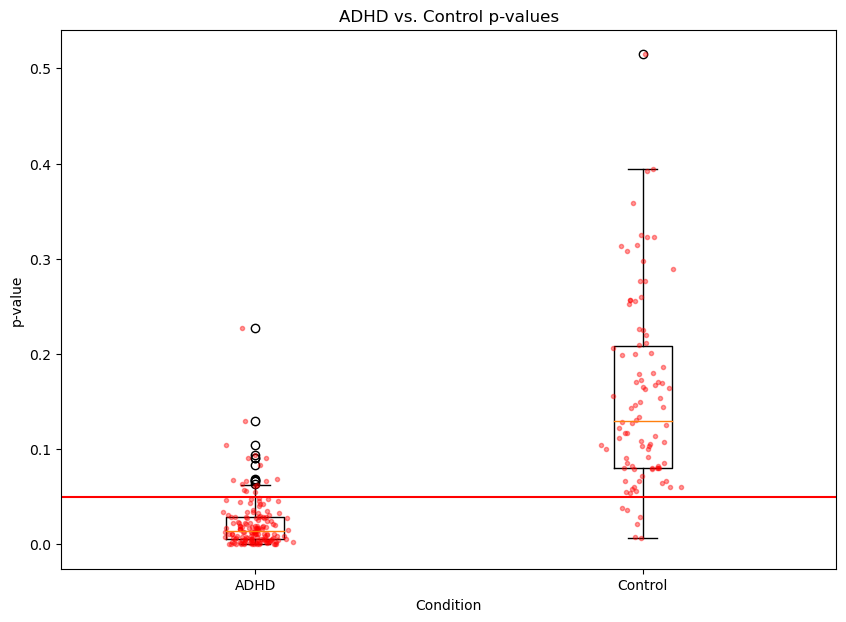

In [5]:

data = [ADHD_pvals, Control_pvals]

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111)
bp = ax.boxplot(data)
for i in range(2):
    y = data[i]
    x = np.random.normal(1+i, 0.04, size=len(y))
    ax.plot(x, y, 'r.', alpha=0.4)

ax.set_xlabel('Condition')
ax.set_ylabel('p-value')
ax.set_xticklabels(['ADHD', 'Control'])
plt.axhline(y = 0.05, color = 'red')
plt.title('ADHD vs. Control p-values')
plt.show()

In [6]:
# Find stats of patient set

ADHD_codes = []
Control_codes = []

#create gender + age arrays

ADHD_mf = []
Control_mf = []

ADHD_age = []
Control_age = []

os.chdir('c:/sri_lab/conditions/ADHD_A_matrices/')
path = os.listdir('c:/sri_lab/conditions/ADHD_A_matrices/')

for file in path:
    tmp = scipy.io.loadmat(file)
    val = tmp.get('patient_code')
    ADHD_codes.append(val[0][0:12])
    tmp = particpant_data[particpant_data['participants_ID'] == val[0][0:12]].index[0]
    ADHD_age.append(particpant_data.iloc[tmp, particpant_data.columns.get_loc('age')])
    if particpant_data.iloc[tmp, particpant_data.columns.get_loc('gender')] == 1:
        ADHD_mf.append('M')
    else:
        ADHD_mf.append('F')

os.chdir('c:/sri_lab/conditions/Control_A_matrices/')
path = os.listdir('c:/sri_lab/conditions/Control_A_matrices/')

for file in path:
    tmp = scipy.io.loadmat(file)
    val = tmp.get('patient_code')
    Control_codes.append(val[0][0:12])
    tmp = particpant_data[particpant_data['participants_ID'] == val[0][0:12]].index[0]
    Control_age.append(particpant_data.iloc[tmp, particpant_data.columns.get_loc('age')])
    if particpant_data.iloc[tmp, particpant_data.columns.get_loc('gender')] == 1:
        Control_mf.append('M')

    else:
        Control_mf.append('F')


#subset ADHD participants

df_ADHD = particpant_data[particpant_data['participants_ID'].isin(ADHD_codes)]

df_ADHD = df_ADHD.drop_duplicates(subset = 'participants_ID', keep = 'first')

#subset Control particpants

df_Control = particpant_data[particpant_data['participants_ID'].isin(Control_codes)]

df_Control = df_Control.drop_duplicates(subset = 'participants_ID', keep = 'first')

print("Mean ADHD patient age:", round(df_ADHD['age'].mean()), u"\u00B1", df_ADHD['age'].std())
print("ADHD M patients:", sum(df_ADHD['gender'] == 1))
print("ADHD F patients:", sum(df_ADHD['gender'] == 0))
print("Mean Control patient age:", round(df_Control['age'].mean()), u"\u00B1", df_ADHD['age'].std())
print("Control M patients:", sum(df_Control['gender'] == 1))
print("Control F patients:", sum(df_Control['gender'] == 0))

# print("Mean ADHD height:", df_ADHD['height'].mean())
# print("Mean Control height:", df_Control['height'].mean())
# print("Mean ADHD weight:", df_ADHD['Weight'].mean())
# print("Mean Control weight:", df_Control['Weight'].mean())

print(len(Control_mf))
print(len(ADHD_mf))
print(len(ADHD_age))
print(len(Control_age))

c:\Users\jeffr\anaconda3\lib\site-packages\scipy\io\matlab\_mio.py:226: MatReadWarning: Duplicate variable name "None" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)


Mean ADHD patient age: 23 ± 13.23561601898194
ADHD M patients: 55
ADHD F patients: 23
Mean Control patient age: 32 ± 13.23561601898194
Control M patients: 16
Control F patients: 31
94
162
162
94


In [7]:
print((df_ADHD['ADHD_pre_Hyp_leading']).mean(), u"\u00B1", (df_ADHD['ADHD_pre_Hyp_leading']).std())
print(df_ADHD['ADHD_pre_Att_leading'].mean(), u"\u00B1", (df_ADHD['ADHD_pre_Att_leading']).std())

5.74468085106383 ± 2.1003942187576516
7.0638297872340425 ± 1.5660009345206405


In [8]:
clean = [score for score in (df_ADHD['ADHD_pre_Hyp_leading'] + df_ADHD['ADHD_pre_Att_leading']) if score != 'nan']
clean

[8,
 nan,
 13,
 11,
 18,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 11,
 nan,
 nan,
 nan,
 nan,
 8,
 15,
 16,
 11,
 nan,
 14,
 nan,
 nan,
 11,
 12,
 nan,
 nan,
 17,
 nan,
 nan,
 nan,
 nan,
 12,
 nan,
 13,
 12,
 18,
 13,
 12,
 6,
 10,
 nan,
 13,
 11,
 13,
 15,
 14,
 13,
 12,
 15,
 12,
 nan,
 10,
 16,
 10,
 11,
 9,
 15,
 13,
 10,
 15,
 9,
 18,
 17,
 13,
 16,
 11,
 nan,
 nan,
 15,
 15,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan]

{'whiskers': [<matplotlib.lines.Line2D at 0x1ce6123f130>,
 'caps': [<matplotlib.lines.Line2D at 0x1ce61255130>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ce6123fd90>],
 'medians': [<matplotlib.lines.Line2D at 0x1ce61255e50>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ce61255400>],
 'means': []}

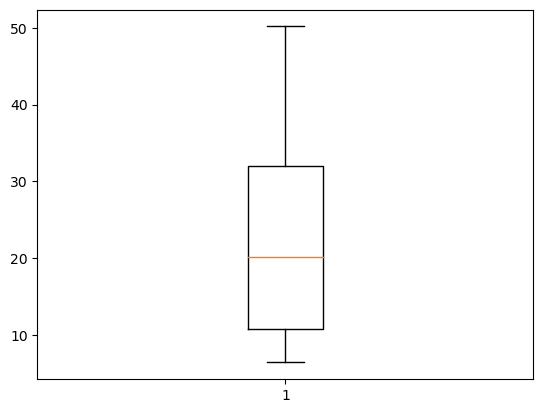

In [9]:
plt.boxplot(df_ADHD['age'])

In [10]:
# Create a matrix of mean sink index values for all patients over all electrodes


nodes = ['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'FC3', 'FCz', 'FC4', 'T7', 'C3', 'Cz', 'C4', 'T8', 'CP3', 
          'CPz', 'CP4', 'P7', 'P3', 'Pz', 'P4', 'P8', 'O1', 'Oz', 'O2']



ADHD_sink = np.empty([26, 1])
Control_sink = np.empty([26, 1])

ADHD_var_sink = np.empty([26, 1])
Control_var_sink = np.empty([26, 1])


os.chdir('c:/sri_lab/conditions/ADHD_A_matrices/')
path = os.listdir('c:/sri_lab/conditions/ADHD_A_matrices/')

for file in path:
    tmp = scipy.io.loadmat(file)
    val = tmp.get('sink_index2_wins')
    var = np.matrix(val).var(1)
    val = np.matrix(val).mean(1)
    tmp_labels = tmp.get('labels_sort')
    

    #sort mean sink index values into matrix based on ordered nodes list
    new = np.empty([26,1])
    new_var = np.empty([26,1])
    for i in range(0, 26):
        index = nodes.index(tmp_labels[0][i][0])
        new[index][0] = val[i][0]
        new_var[index][0] = var[i][0]

    ADHD_sink = np.hstack((ADHD_sink, new))
    ADHD_var_sink = np.hstack((ADHD_var_sink, new_var))

os.chdir('c:/sri_lab/conditions/Control_A_matrices/')
path = os.listdir('c:/sri_lab/conditions/Control_A_matrices/')

for file in path:
    tmp = scipy.io.loadmat(file)
    val = tmp.get('sink_index2_wins')
    var = np.matrix(val).var(1)
    val = np.matrix(val).mean(1)
    tmp_labels = tmp.get('labels_sort')

    #sort mean sink index values into matrix based on ordered nodes list
    new = np.empty([26,1])
    new_var = np.empty([26,1])
    for i in range(0, 26):
        index = nodes.index(tmp_labels[0][i][0])
        new[index][0] = val[i][0]
        new_var[index][0] = var[i][0]

    Control_sink = np.hstack((Control_sink, new))
    Control_var_sink = np.hstack((Control_var_sink, new_var))

Control_sink


c:\Users\jeffr\anaconda3\lib\site-packages\scipy\io\matlab\_mio.py:226: MatReadWarning: Duplicate variable name "None" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)
C:\Users\jeffr\AppData\Local\Temp\ipykernel_17752\416818411.py:32: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  new[index][0] = val[i][0]
C:\Users\jeffr\AppData\Local\Temp\ipykernel_17752\416818411.py:33: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  new_var[index][0] = var[i][0]
C:\Users\jeffr\AppData\Local\Temp\ipykernel_17752\416818411.py:53: DeprecationWarni

array([[0.        , 0.72869454, 0.54564315, ..., 1.38222151, 1.29428663,
        1.49888286],
       [0.        , 0.67491222, 0.55569741, ..., 1.47414619, 1.28758379,
        0.85844239],
       [0.        , 0.79269071, 0.3638685 , ..., 0.78024258, 0.98579636,
        1.10548995],
       ...,
       [0.        , 0.83147143, 1.18017874, ..., 0.77784871, 1.23922758,
        1.44621768],
       [0.        , 0.86546441, 1.65496329, ..., 1.38461538, 0.42866262,
        1.02713055],
       [0.        , 0.82971593, 1.07213533, ..., 1.08011491, 1.18129588,
        0.93073731]])

In [11]:
'''
os.chdir("C:/sri_lab/code/")
np.savetxt("ADHD_sink_individual.csv", ADHD_sink)
np.savetxt("Control_sink_individual.csv", Control_sink)
'''

Control_sink = np.asarray(Control_sink)

print(np.shape(Control_sink))

(26, 95)


In [12]:

os.chdir('C:/sri_lab/')
ADHD_sink_total = ADHD_sink.mean(axis=1)
Control_sink_total = Control_sink.mean(axis=1)
np.savetxt("ADHD_sink_total.csv", ADHD_sink_total.T)
np.savetxt("Control_sink_total.csv", Control_sink_total.T)

In [26]:
inds = []
labels = []

var_inds = []
var_labels = []

pfc = [0, 1, 2, 3, 5, 6]
frontal = [4, 7, 8, 9, 12]
parietal = [11, 13, 15, 17, 19, 20, 21]
occipital = [23, 24, 25]
temporal = [10, 14, 18, 22] 


for i in range(0, 26):
    val = stats.ks_2samp(ADHD_sink[i, 1:].T, Control_sink[i, 1:].T)
    var_val = stats.ks_2samp(ADHD_var_sink[i, 1:].T, Control_var_sink[i, 1:].T)
    print(val)
    if val.pvalue < 0.05:
        inds.append(i)
        labels.append(nodes[i])

    if var_val.pvalue < 0.001:
        var_inds.append(i)
        var_labels.append(nodes[i])


ADHD_sink_clean = ADHD_sink[inds]
Control_sink_clean = Control_sink[inds]

ADHD_var_sink_clean = ADHD_var_sink[var_inds]
Control_var_sink_clean = Control_var_sink[var_inds]


ADHD_region_mat = []
Control_region_mat = []

ADHD_pfc = ADHD_sink[pfc]
Control_pfc = Control_sink[pfc]
ADHD_fc = ADHD_sink[frontal]
Control_fc = Control_sink[frontal]
ADHD_pc = ADHD_sink[parietal]
Control_pc = Control_sink[parietal]
ADHD_oc = ADHD_sink[occipital]
Control_oc = Control_sink[occipital]
ADHD_tc = ADHD_sink[temporal]
Control_tc = Control_sink[temporal]


ADHD_region_mat.append(ADHD_pfc.T[1:,].mean(axis=1))
ADHD_region_mat.append(ADHD_fc.T[1:,].mean(axis=1))
ADHD_region_mat.append(ADHD_pc.T[1:,].mean(axis=1))
ADHD_region_mat.append(ADHD_oc.T[1:,].mean(axis=1))
ADHD_region_mat.append(ADHD_tc.T[1:,].mean(axis=1))

Control_region_mat.append(Control_pfc.T[1:,].mean(axis=1))
Control_region_mat.append(Control_fc.T[1:,].mean(axis=1))
Control_region_mat.append(Control_pc.T[1:,].mean(axis=1))
Control_region_mat.append(Control_oc.T[1:,].mean(axis=1))
Control_region_mat.append(Control_tc.T[1:,].mean(axis=1))

print(np.size(Control_sink_clean.T[1:,1]))



KstestResult(statistic=0.12713422642500657, pvalue=0.2629213597319859)
KstestResult(statistic=0.17953769372209089, pvalue=0.036927045135925284)
KstestResult(statistic=0.12266876805883899, pvalue=0.3010800342071976)
KstestResult(statistic=0.1841344890990281, pvalue=0.030120803163316653)
KstestResult(statistic=0.09850275807722617, pvalue=0.567660954496945)
KstestResult(statistic=0.1038875755187812, pvalue=0.5005625411601065)
KstestResult(statistic=0.15182558444969793, pvalue=0.11344922930821458)
KstestResult(statistic=0.11912266876805884, pvalue=0.3339116659096937)
KstestResult(statistic=0.12923561859732072, pvalue=0.24608275053500941)
KstestResult(statistic=0.1216180719726819, pvalue=0.31058932137079515)
KstestResult(statistic=0.12674021539269767, pvalue=0.26610526326693934)
KstestResult(statistic=0.11373785132650381, pvalue=0.38847515641396)
KstestResult(statistic=0.10966640399264513, pvalue=0.4329294344097915)
KstestResult(statistic=0.12477016023115314, pvalue=0.28250943658114713)
Kst

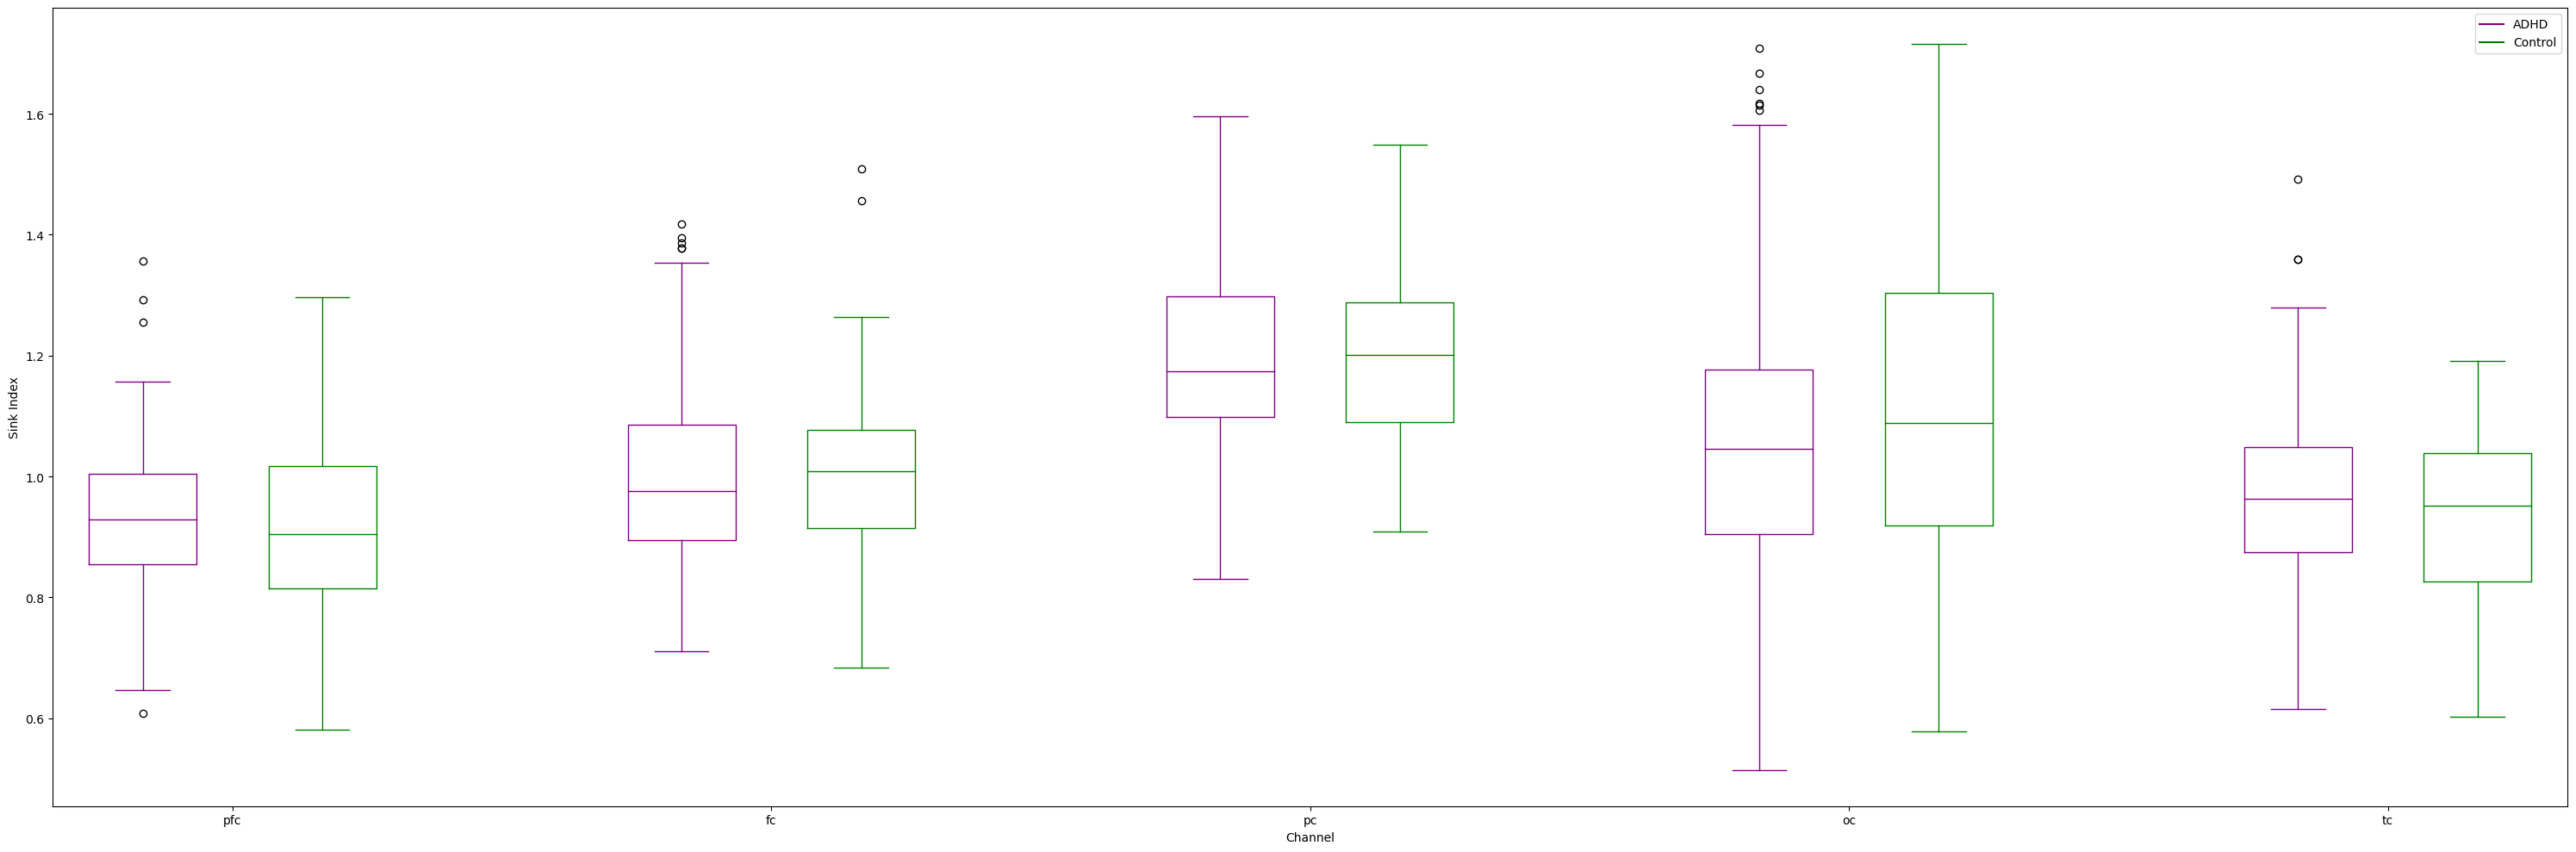

In [14]:
nodes = ['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'FC3', 'FCz', 'FC4', 'T7', 'C3', 'Cz', 'C4', 'T8', 'CP3', 
          'CPz', 'CP4', 'P7', 'P3', 'Pz', 'P4', 'P8', 'O1', 'Oz', 'O2']


os.chdir('c:/sri_lab/plots/')

fig = plt.figure(figsize=(30, 10))

def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)

# base boxplot, ADHD_sink[:,1:].T, len(nodes)
# grouped boxplot, ADHD_region_mat (0, 5)
# ttest boxplot, ADHD_sink_clean, (0, len(inds))


ADHD_bp = plt.boxplot(ADHD_region_mat, positions = [1 + 3*i for i in range(0, 5)], widths = 0.6)
Control_bp = plt.boxplot(Control_region_mat, positions = [2 + 3*i for i in range(0, 5)], widths = 0.6)
set_box_color(ADHD_bp, 'purple')
set_box_color(Control_bp, 'green')

    
plt.plot([], c='purple', label='ADHD')
plt.plot([], c='green', label='Control')
plt.legend()

plt.xticks([1.5 + 3*i for i in range(0, 5)], ['pfc', 'fc', 'pc', 'oc', 'tc'])
plt.xlabel("Channel")
plt.ylabel("Sink Index")
plt.tight_layout()

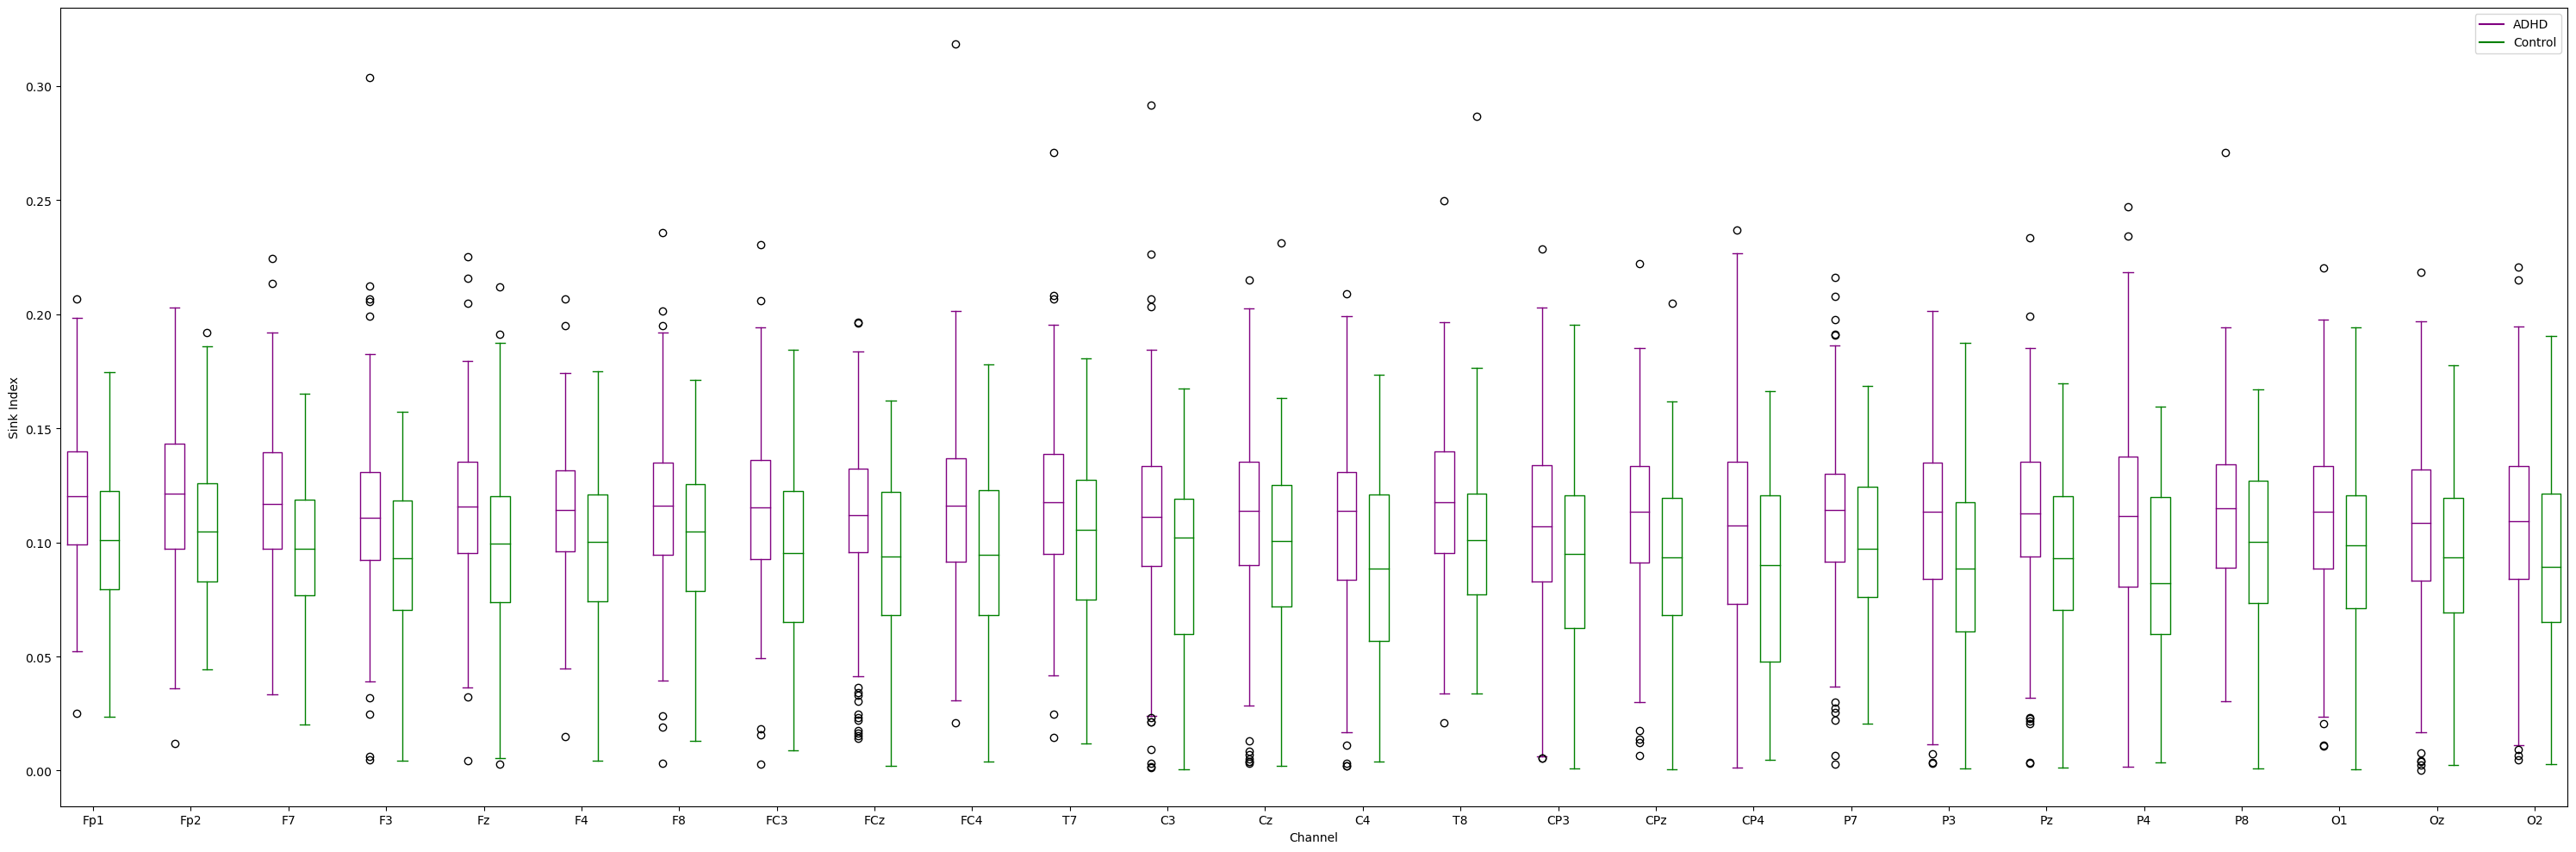

In [15]:
nodes = ['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'FC3', 'FCz', 'FC4', 'T7', 'C3', 'Cz', 'C4', 'T8', 'CP3', 
          'CPz', 'CP4', 'P7', 'P3', 'Pz', 'P4', 'P8', 'O1', 'Oz', 'O2']


os.chdir('c:/sri_lab/plots/')

fig = plt.figure(figsize=(30, 10))

def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)

# base boxplot, ADHD_sink[:,1:].T, len(nodes)
# grouped boxplot, ADHD_region_mat (0, 5)
# ttest boxplot, ADHD_sink_clean, (0, len(inds))


ADHD_bp = plt.boxplot(ADHD_var_sink.T[1:,], positions = [1 + 3*i for i in range(len(nodes))], widths = 0.6)
Control_bp = plt.boxplot(Control_var_sink.T[1:,], positions = [2 + 3*i for i in range(len(nodes))], widths = 0.6)
set_box_color(ADHD_bp, 'purple')
set_box_color(Control_bp, 'green')

    
plt.plot([], c='purple', label='ADHD')
plt.plot([], c='green', label='Control')
plt.legend()

plt.xticks([1.5 + 3*i for i in range(len(nodes))], nodes)
plt.xlabel("Channel")
plt.ylabel("Sink Index")
plt.tight_layout()

C:\Users\jeffr\AppData\Local\Temp\ipykernel_17752\4088427928.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


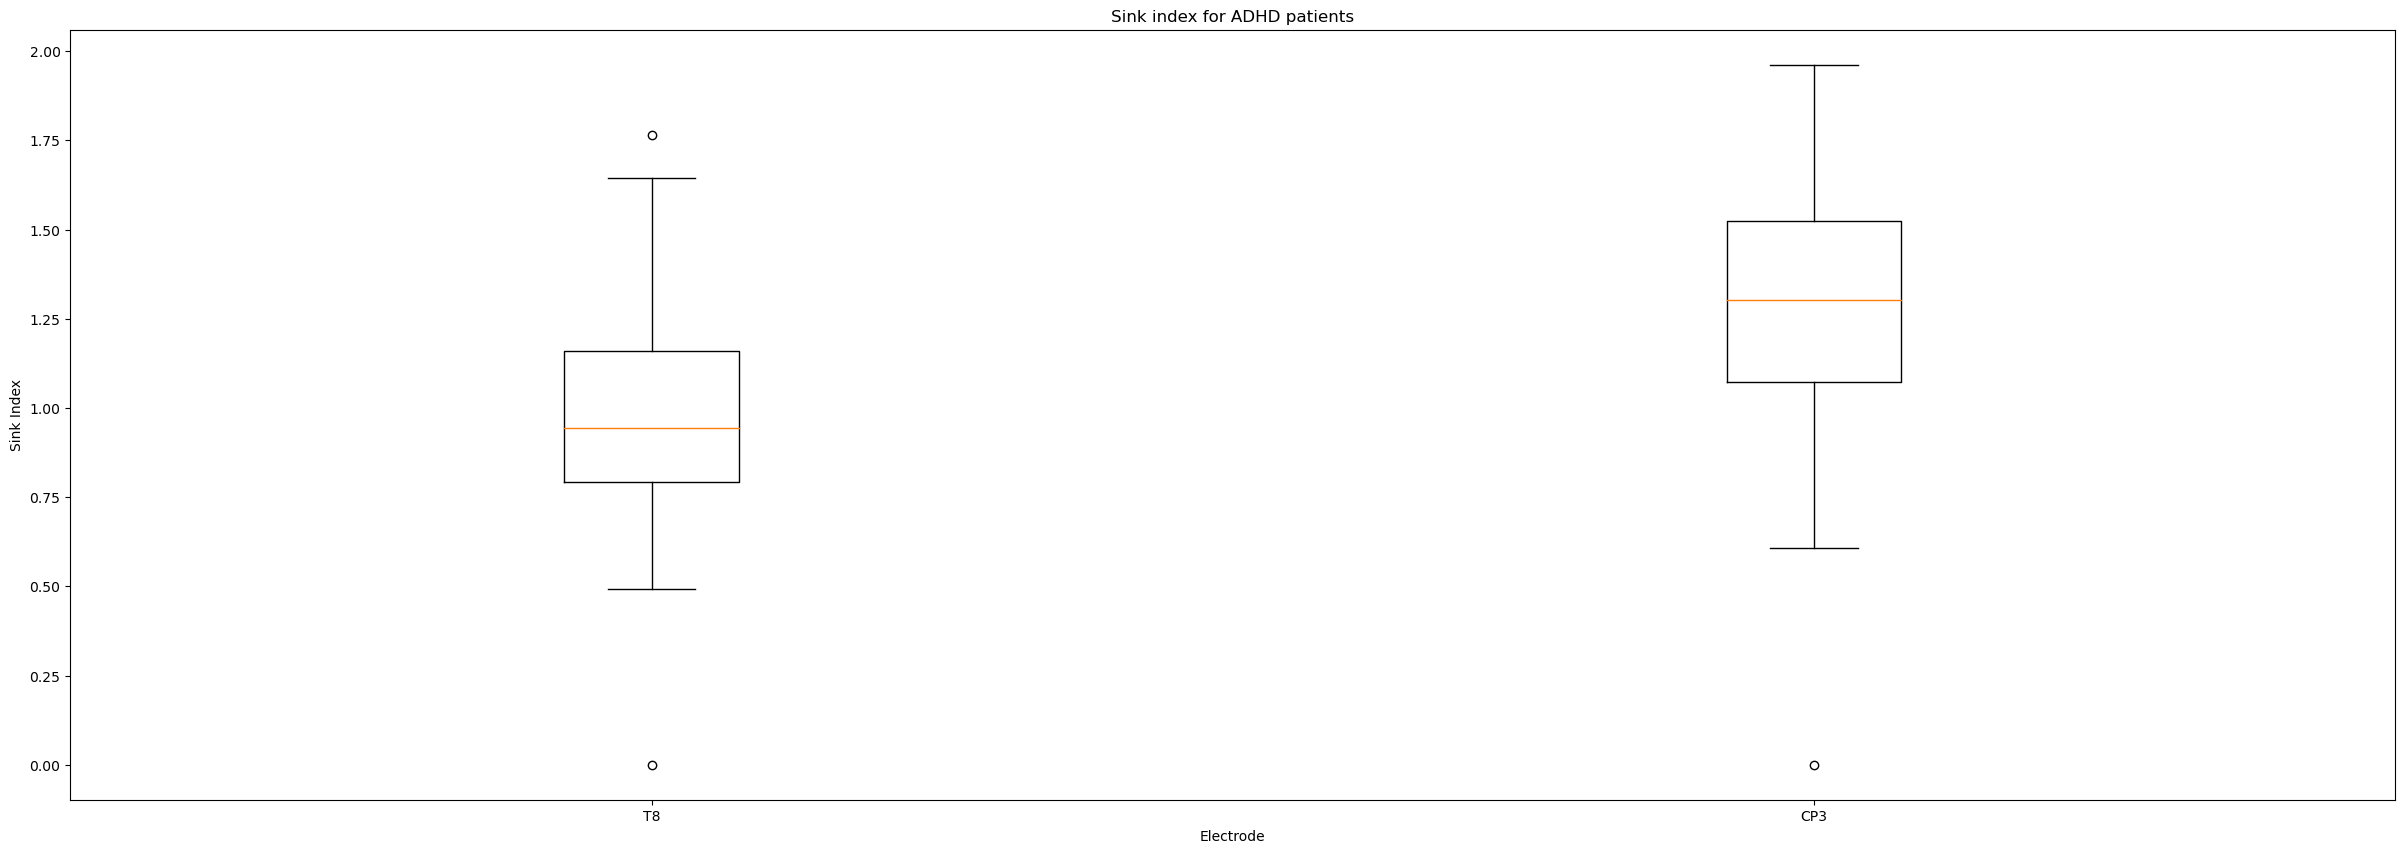

In [16]:
# base ADHD plot


fig = plt.figure(figsize=(30, 10))
ax = fig.add_subplot(111)
ax.set_xlabel('Electrode')
ax.set_ylabel('Sink Index')
data = ADHD_sink_clean.T
ax.set_xticklabels(labels)
bp = ax.boxplot(data)

plt.title('Sink index for ADHD patients')
plt.show()

C:\Users\jeffr\AppData\Local\Temp\ipykernel_17752\647856616.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


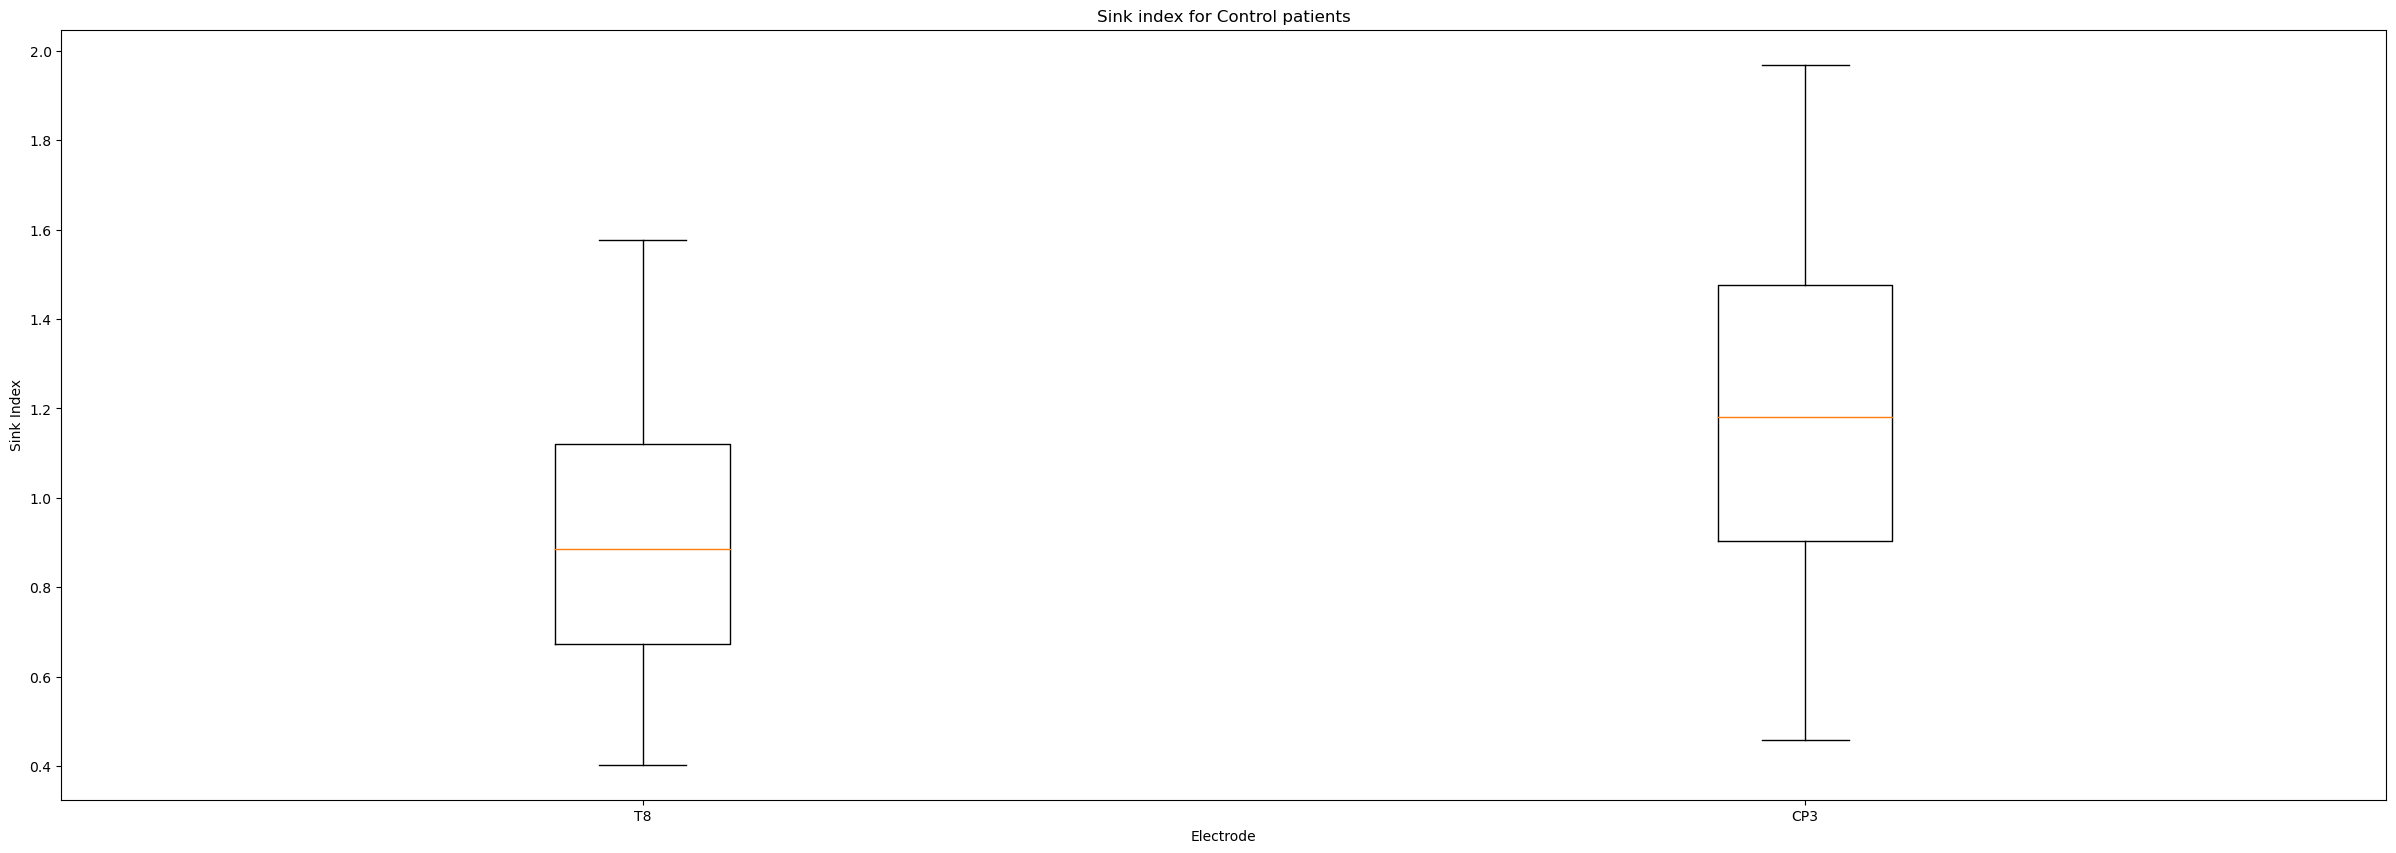

In [17]:
# base Control plot

os.chdir('c:/sri_lab/plots/')

fig = plt.figure(figsize=(30, 10))
ax = fig.add_subplot(111)
ax.set_xlabel('Electrode')
ax.set_ylabel('Sink Index')
data = Control_sink_clean[:,1:].T
ax.set_xticklabels(labels)
bp = ax.boxplot(data)

plt.title('Sink index for Control patients')
plt.show()

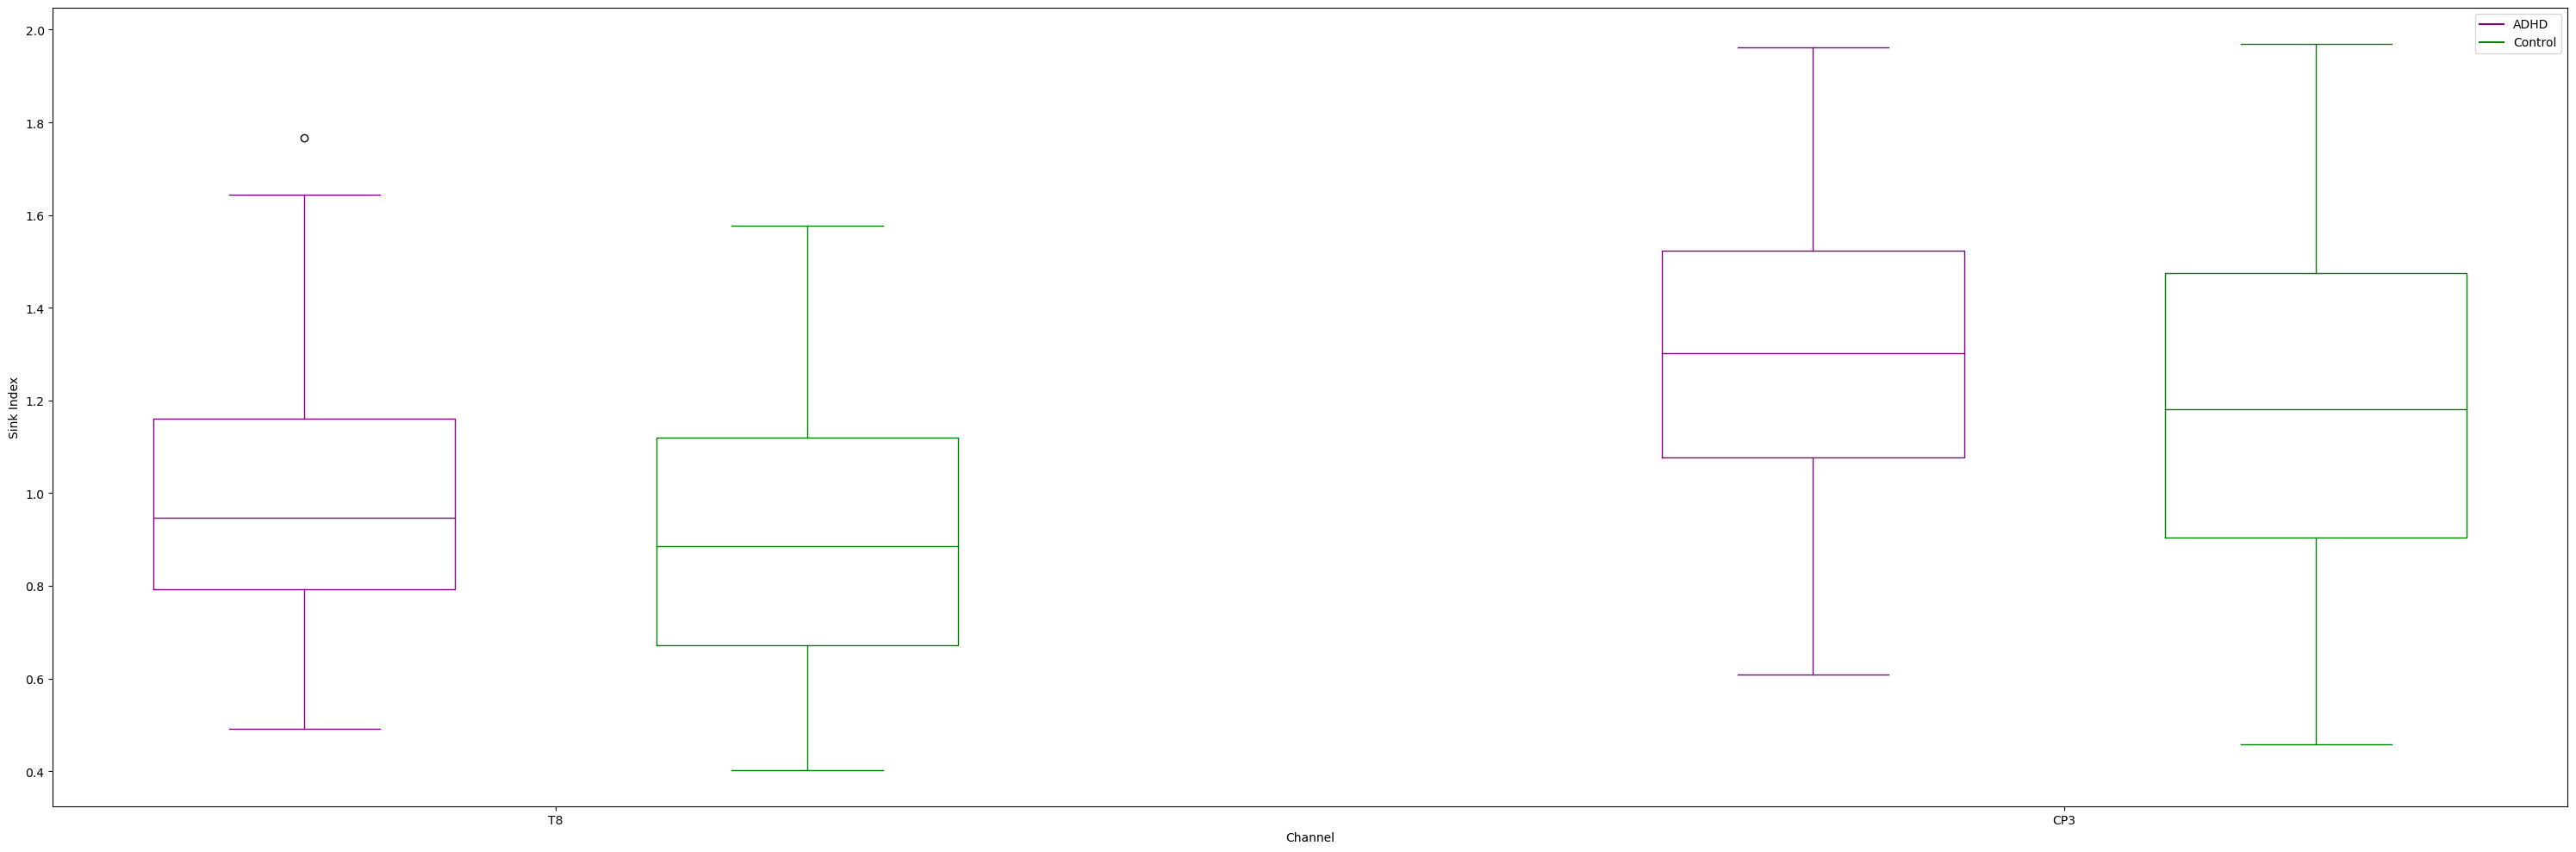

In [18]:
nodes = ['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'FC3', 'FCz', 'FC4', 'T7', 'C3', 'Cz', 'C4', 'T8', 'CP3', 
          'CPz', 'CP4', 'P7', 'P3', 'Pz', 'P4', 'P8', 'O1', 'Oz', 'O2']


os.chdir('c:/sri_lab/plots/')

fig = plt.figure(figsize=(30, 10))

def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)

# base boxplot, ADHD_sink[:,1:].T, len(nodes)
# grouped boxplot, ADHD_region_mat (0, 5)
# ttest boxplot, ADHD_sink_clean, (0, len(inds))


ADHD_bp = plt.boxplot(ADHD_sink_clean.T[1:,], positions = [1 + 3*i for i in range(len(inds))], widths = 0.6)
Control_bp = plt.boxplot(Control_sink_clean.T[1:,], positions = [2 + 3*i for i in range(len(inds))], widths = 0.6)
set_box_color(ADHD_bp, 'purple')
set_box_color(Control_bp, 'green')

plt.plot([], c='purple', label='ADHD')
plt.plot([], c='green', label='Control')
plt.legend()

plt.xticks([1.5 + 3*i for i in range(len(inds))], labels)
plt.xlabel("Channel")
plt.ylabel("Sink Index")
plt.tight_layout()

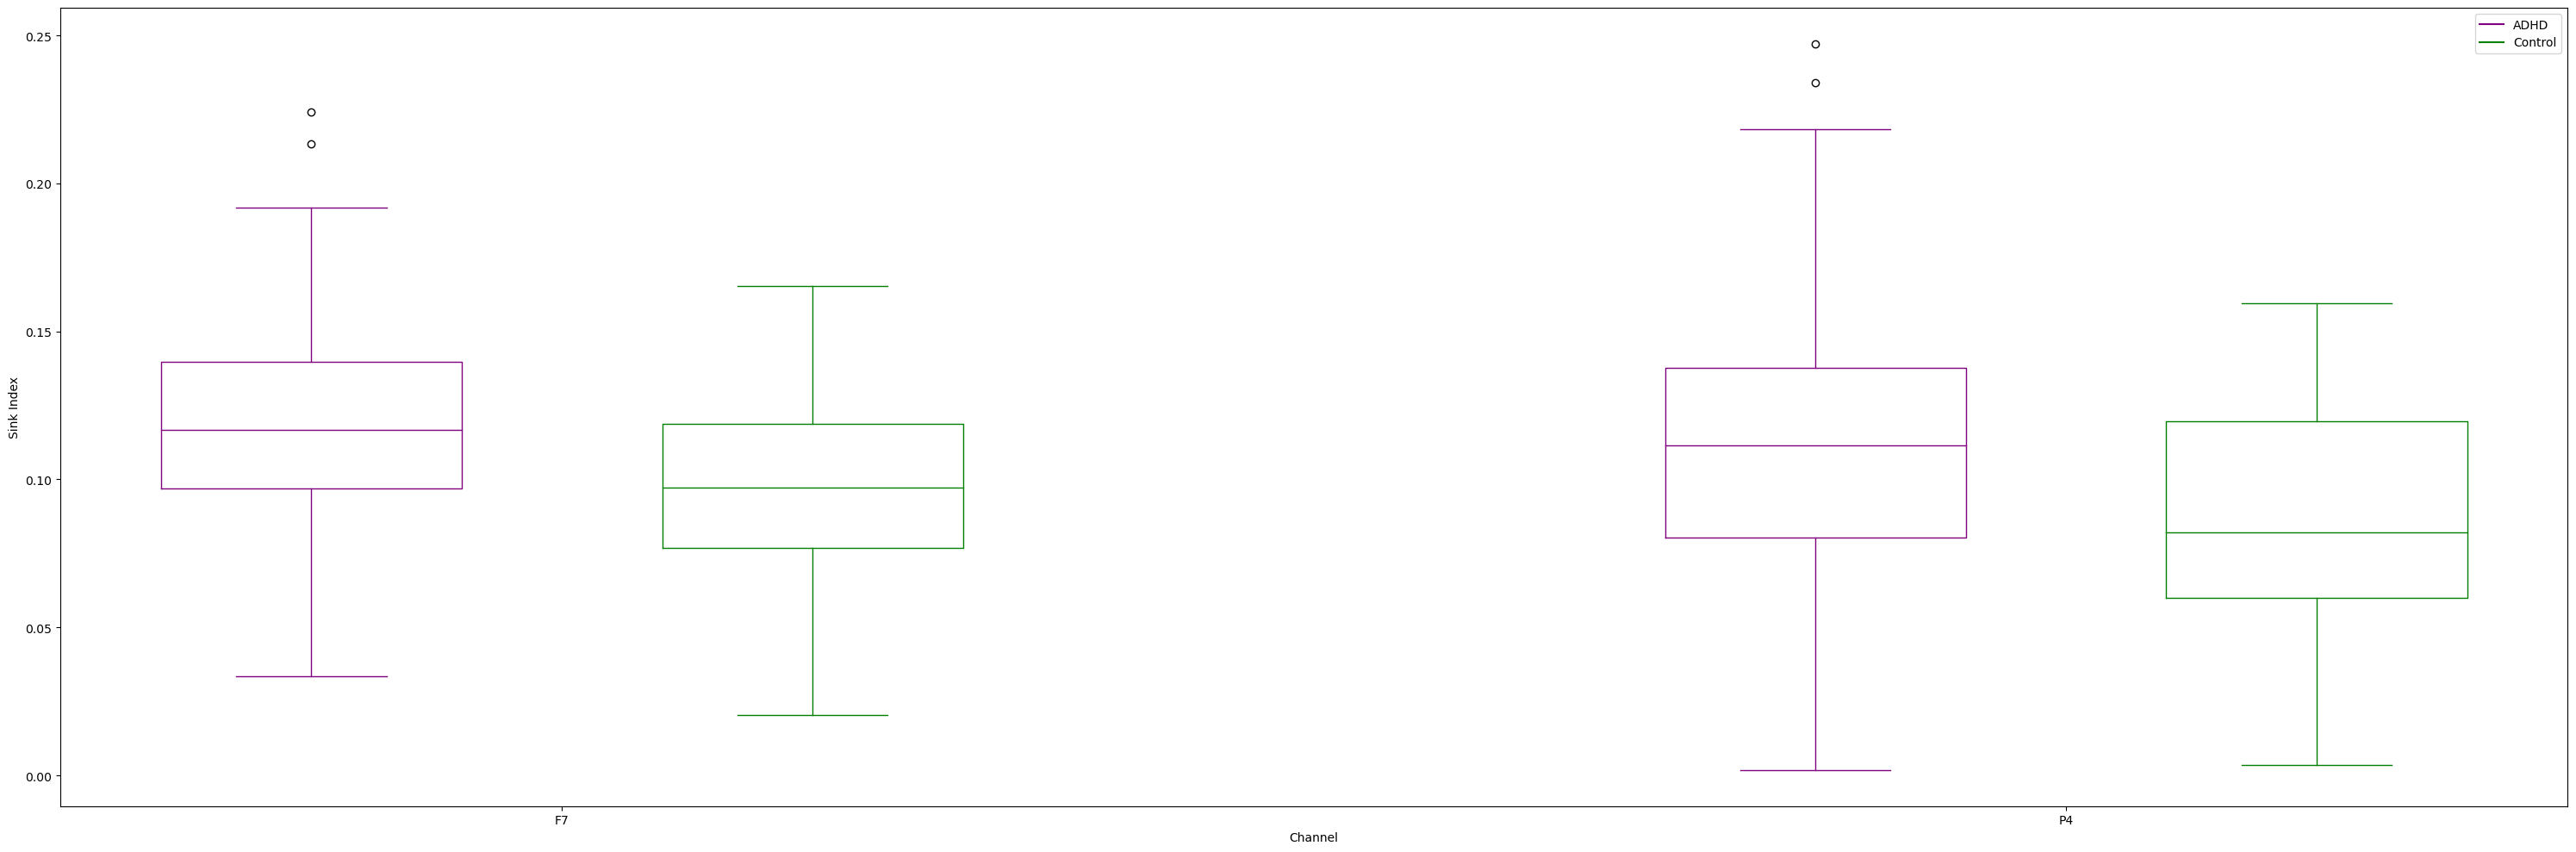

In [19]:
nodes = ['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'FC3', 'FCz', 'FC4', 'T7', 'C3', 'Cz', 'C4', 'T8', 'CP3', 
          'CPz', 'CP4', 'P7', 'P3', 'Pz', 'P4', 'P8', 'O1', 'Oz', 'O2']


os.chdir('c:/sri_lab/plots/')

fig = plt.figure(figsize=(30, 10))

def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)

# base boxplot, ADHD_sink[:,1:].T, len(nodes)
# grouped boxplot, ADHD_region_mat (0, 5)
# ttest boxplot, ADHD_sink_clean, (0, len(inds))


ADHD_bp = plt.boxplot(ADHD_var_sink_clean.T[1:,], positions = [1 + 3*i for i in range(len(var_inds))], widths = 0.6)
Control_bp = plt.boxplot(Control_var_sink_clean.T[1:,], positions = [2 + 3*i for i in range(len(var_inds))], widths = 0.6)
set_box_color(ADHD_bp, 'purple')
set_box_color(Control_bp, 'green')

plt.plot([], c='purple', label='ADHD')
plt.plot([], c='green', label='Control')
plt.legend()

plt.xticks([1.5 + 3*i for i in range(len(var_inds))], var_labels)
plt.xlabel("Channel")
plt.ylabel("Sink Index")
plt.tight_layout()

c:\Users\jeffr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\jeffr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\jeffr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\jeffr\anacond

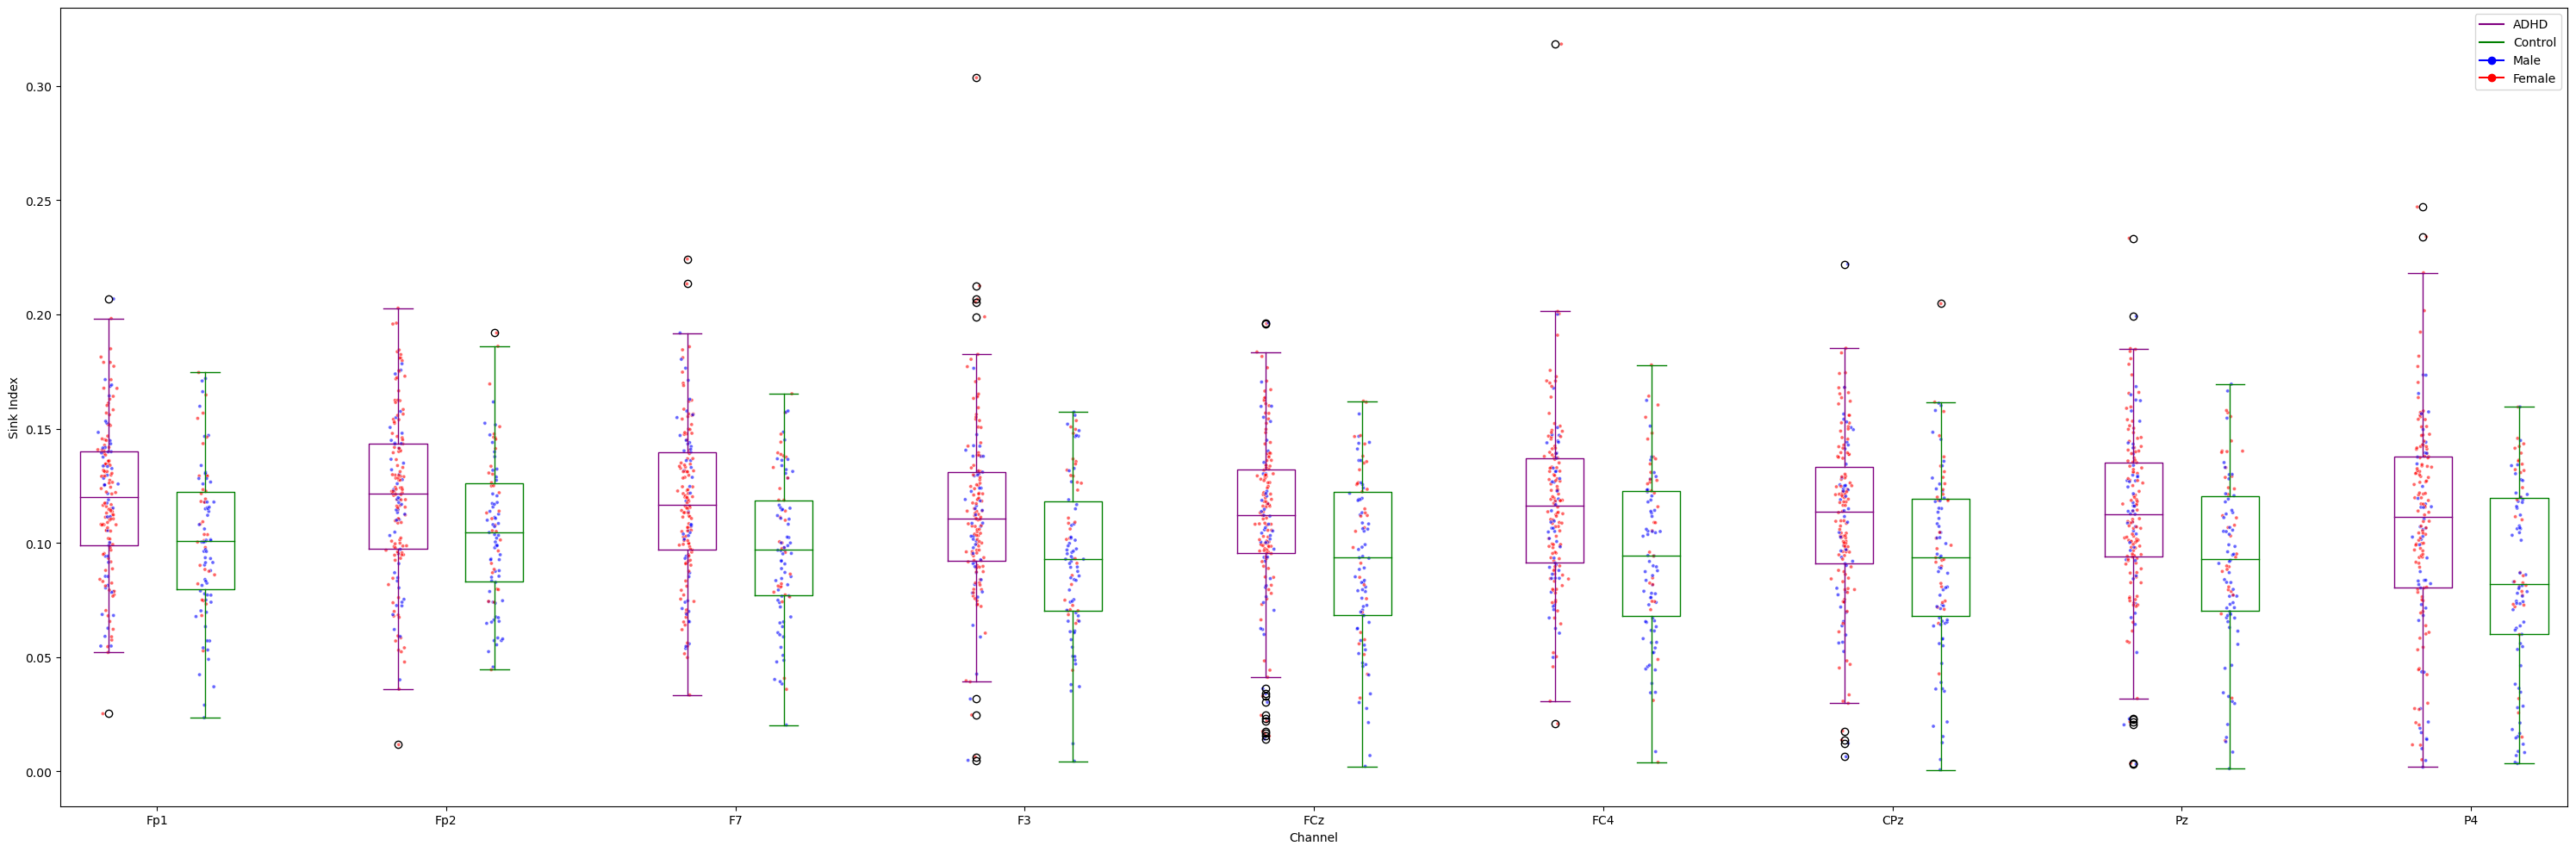

In [30]:
# Create boxplots of sink index values for each electrode, grouped and statistical tests
import seaborn as sns

nodes = ['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'FC3', 'FCz', 'FC4', 'T7', 'C3', 'Cz', 'C4', 'T8', 'CP3', 
          'CPz', 'CP4', 'P7', 'P3', 'Pz', 'P4', 'P8', 'O1', 'Oz', 'O2']


os.chdir('c:/sri_lab/plots/')

fig = plt.figure(figsize=(30, 10))

def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)

# base boxplot, ADHD_sink[:,1:].T, len(nodes)
# grouped boxplot, ADHD_region_mat (0, 5)
# ttest boxplot, ADHD_sink_clean, (0, len(inds))


ADHD_bp = plt.boxplot(ADHD_var_sink_clean.T[1:,], positions = [1 + 3*i for i in range(len(var_inds))], widths = 0.6)
Control_bp = plt.boxplot(Control_var_sink_clean.T[1:,], positions = [2 + 3*i for i in range(len(var_inds))], widths = 0.6)
set_box_color(ADHD_bp, 'purple')
set_box_color(Control_bp, 'green')
for i in range(len(var_inds)):
    y  = ADHD_var_sink_clean.T[1:,i]
    x =  np.random.normal(1+3*i, 0.04, size=len(y))
    sns.scatterplot(x, y, marker='.', hue=ADHD_mf, alpha=0.6, legend=False, palette=['blue', 'red'])
    
for i in range(len(var_inds)):
    y  = Control_var_sink_clean.T[1:,i]
    x =  np.random.normal(2+3*i, 0.04, size=len(y))
    sns.scatterplot(x, y, marker='.', hue=Control_mf, alpha=0.6, legend=False, palette=['blue', 'red'])
    
plt.plot([], c='purple', label='ADHD')
plt.plot([], c='green', label='Control')
plt.plot([], c='blue', marker='o', label='Male')
plt.plot([], c='red', marker='o', label='Female')
plt.legend()

plt.xticks([1.5 + 3*i for i in range(len(var_inds))], var_labels)
plt.xlabel("Channel")
plt.ylabel("Sink Index")
plt.tight_layout()


74
(94,)


c:\Users\jeffr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\jeffr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\jeffr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\jeffr\anacond

ValueError: All arrays must be of the same length

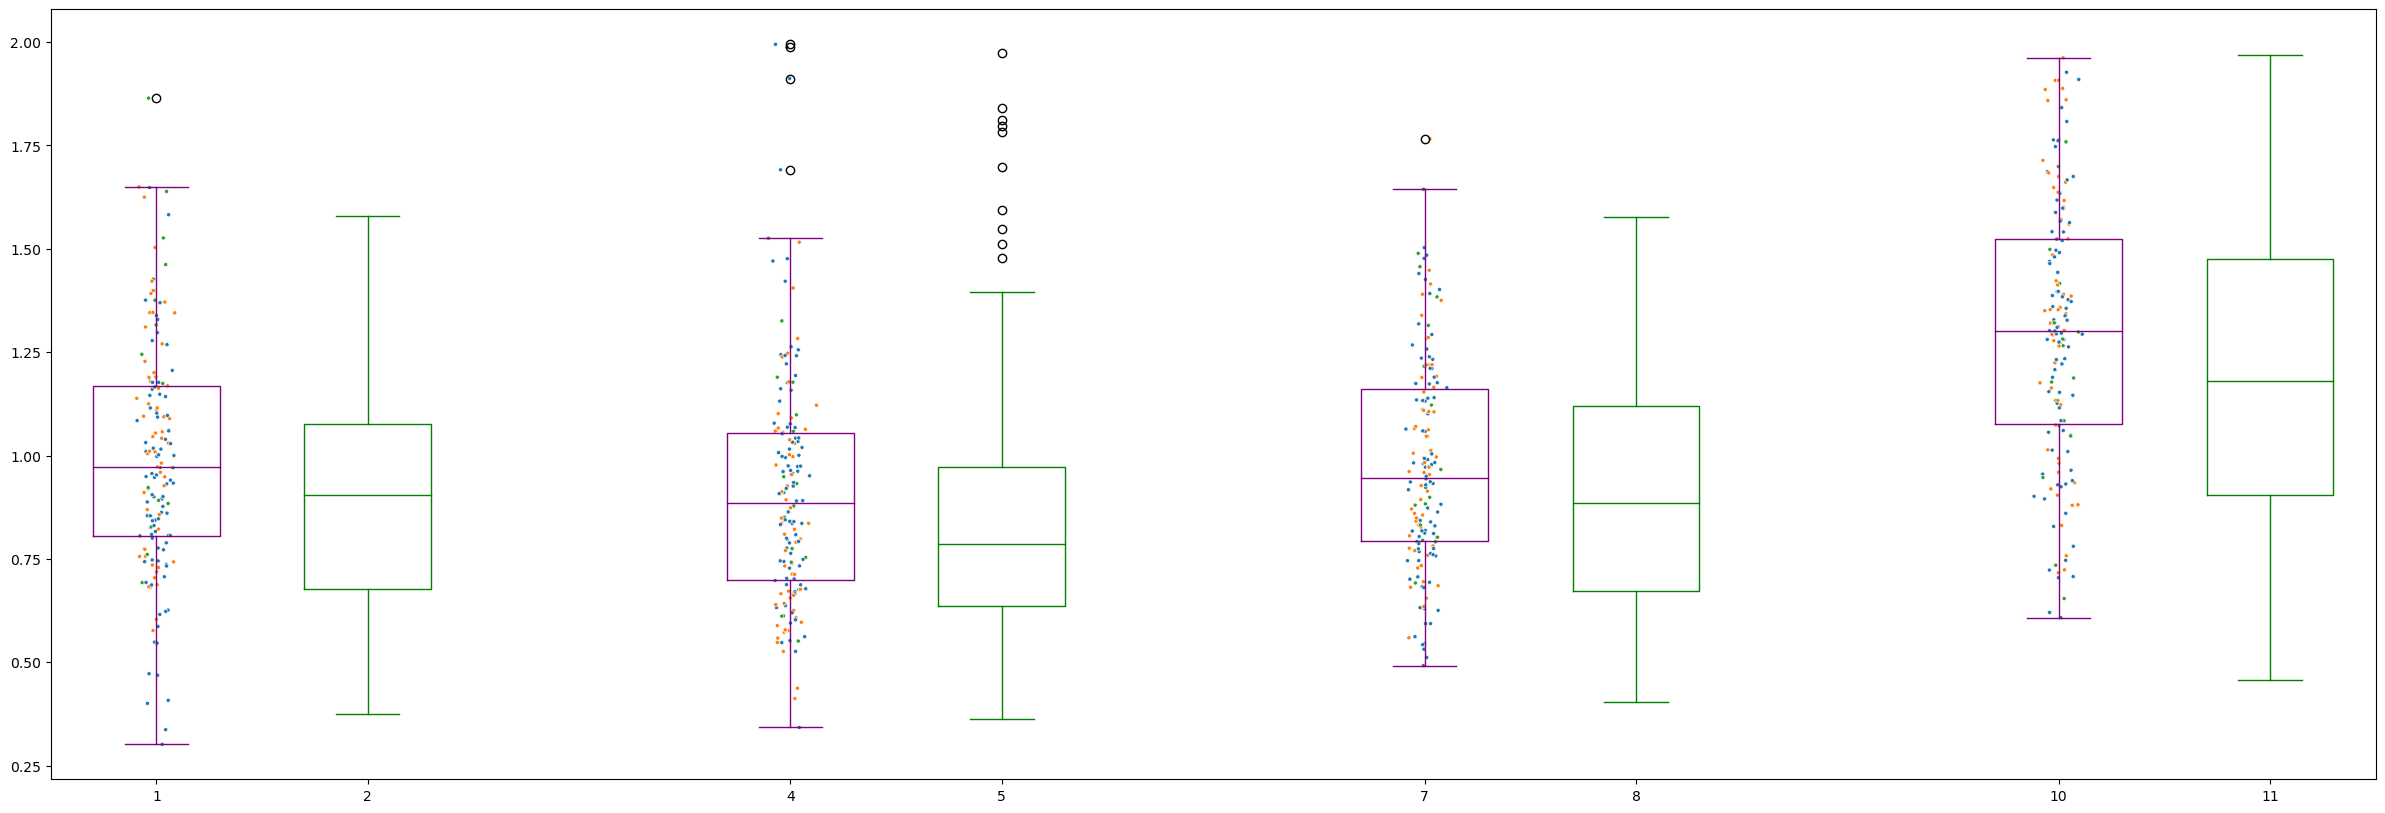

In [22]:
# Create boxplots of sink index values for each electrode, grouped and statistical tests
import seaborn as sns

nodes = ['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'FC3', 'FCz', 'FC4', 'T7', 'C3', 'Cz', 'C4', 'T8', 'CP3', 
          'CPz', 'CP4', 'P7', 'P3', 'Pz', 'P4', 'P8', 'O1', 'Oz', 'O2']


os.chdir('c:/sri_lab/plots/')

fig = plt.figure(figsize=(30, 10))

def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)

ADHD_group_age = []
Control_group_age = []

for age in ADHD_age:
    if age <= 1:
        ADHD_group_age.append('infant')
    if age > 1 and age < 13:
        ADHD_group_age.append('child')
    if age >= 13 and age < 18:
        ADHD_group_age.append('adolescent')
    if age >= 18 and age < 65:
        ADHD_group_age.append('adult')
    if age >= 65:
        ADHD_group_age.append('senior')


for age in Control_age:
    if age <= 1:
        Control_group_age.append('infant')
    if age > 1 and age < 13:
        Control_group_age.append('child')
    if age >= 13 and age < 18:
        Control_group_age.append('adolescent')
    if age >= 18 and age < 65:
        Control_group_age.append('adult')
    if age >= 65:
        Control_group_age.append('senior')
    if age == 'nan':
        Control_group_age.append('n/a')


ADHD_bp = plt.boxplot(ADHD_sink_clean.T[1:,], positions = [1 + 3*i for i in range(len(inds))], widths = 0.6)
Control_bp = plt.boxplot(Control_sink_clean.T[1:,], positions = [2 + 3*i for i in range(len(inds))], widths = 0.6)
set_box_color(ADHD_bp, 'purple')
set_box_color(Control_bp, 'green')
for i in range(len(inds)):
    y  = ADHD_sink_clean.T[1:,i]
    x =  np.random.normal(1+3*i, 0.04, size=len(y))
    sns.scatterplot(x, y, marker='.', hue=ADHD_group_age, alpha=1, legend=False)

print(len(Control_group_age))
print(np.shape(Control_sink_clean.T[1:,i]))
    
for i in range(len(inds)):
    y  = Control_sink_clean.T[1:,i]
    x =  np.random.normal(2+3*i, 0.04, size=len(y))
    sns.scatterplot(x, y, marker='.', hue=Control_group_age, alpha=0.6, legend=False)
    
plt.plot([], c='purple', label='ADHD')
plt.plot([], c='green', label='Control')
plt.plot([], c='red', marker='o', label='infant')
plt.plot([], c='orange', marker='o', label='child')
plt.plot([], c='yellow', marker='o', label='adolescent')
plt.plot([], c='green', marker='o', label='adult')
plt.plot([], c='blue', marker='o', label='senior')
plt.legend()

plt.xticks([1.5 + 3*i for i in range(len(inds))], labels)
plt.xlabel("Channel")
plt.ylabel("Sink Index")
plt.tight_layout()

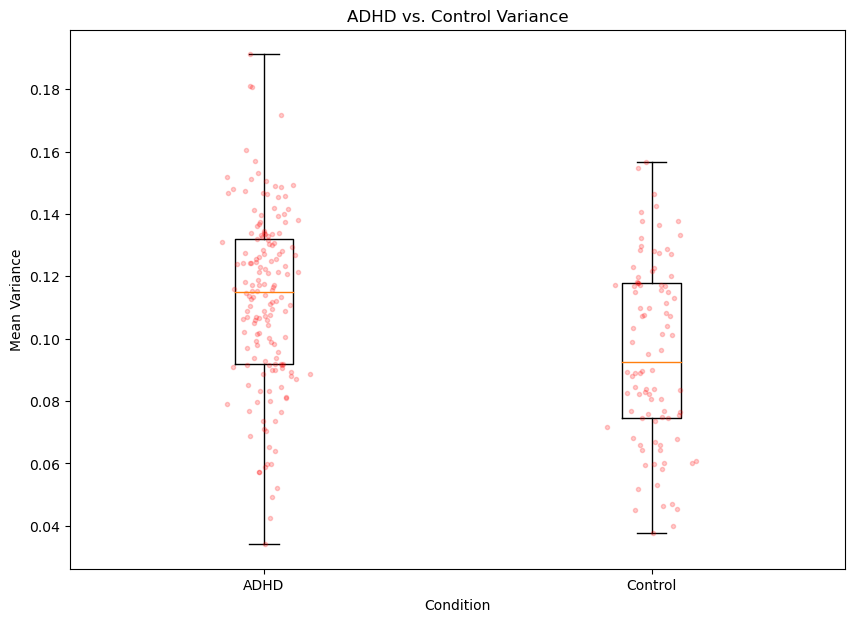

In [69]:
ADHD_ratio = []
Control_ratio = []

for x in range(1, len(ADHD_sink[pfc,:][0])):
    ADHD_ratio.append(np.log2(ADHD_sink[parietal,x].mean() / ADHD_sink[pfc,x].mean()))

for x in range(1, len(Control_sink[pfc,:][0])):
    Control_ratio.append(np.log2(Control_sink[parietal].mean() / Control_sink[pfc,x].mean()))

data = [ADHD_var_sink_clean.T[1:,].mean(axis=1), Control_var_sink_clean.T[1:,].mean(axis=1)]

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111)
bp = ax.boxplot(data)
for i in range(2):
    y = data[i]
    x = np.random.normal(1+i, 0.04, size=len(y))
    ax.plot(x, y, 'r.', alpha=0.2)

ax.set_xlabel('Condition')
ax.set_ylabel('Mean Variance')
ax.set_xticklabels(['ADHD', 'Control'])
plt.title('ADHD vs. Control Variance')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[8, nan, 13, 11, 18, nan, nan, nan, nan, nan, nan, 11, nan, nan, nan, nan, 8, 15, 16, 11, nan, 14, nan, nan, 11, 12, nan, nan, 17, nan, nan, nan, nan, 12, nan, 13, 12, 18, 13, 12, 6, 10, nan, 13, 11, 13, 15, 14, 13, 12, 15, 12, nan, 10, 16, 10, 11, 9, 15, 13, 10, 15, 9, 18, 17, 13, 16, 11, nan, nan, 15, 15, nan, nan, nan, nan, nan, nan]
[-0.33681443  0.99093351  0.45831896  0.42386402  0.72475075  1.14673208
  0.01709465  0.06291993  0.43569854  0.62158718  0.11486461 -0.03068144
 -0.35970945  0.02772038  0.30813277  0.94128821  0.04032997  0.78656313
  0.35324056  0.78396008  0.47299035  0.44024979  0.09048045  0.74774889
  0.18079778  0.04318402  0.37417734  0.51872149  0.19260718  0.81890536
 -0.06458528  0.25523879  0.220458    0.32204396  0.26313616  0.35161804
  0.11413629  0.72307359  0.41805623  0.58180739 -0.14633625  0.42970079
  0.26694268  0.86292814  0.15589471 -0.15352198  0.19318391  0.44633813
  0.1813696   0.11357893  0.12327847  0.37863019  0.26644843 -0.11084136
 -0.

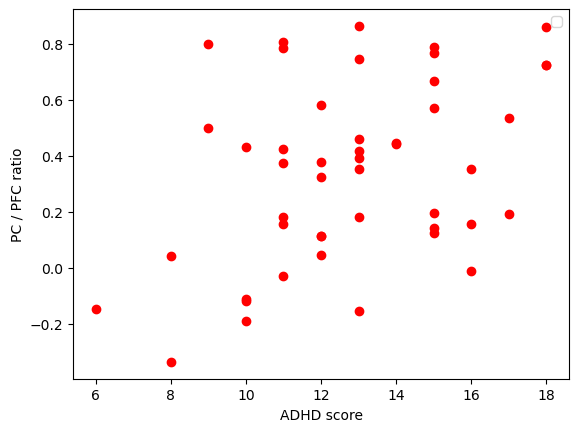

In [ ]:
# plot ADHD score vs sink index

clean = []
clean_index = []
for i in range(len(list(df_ADHD['ADHD_pre_Att_leading']))):
    ADHD_score = list(df_ADHD['ADHD_pre_Hyp_leading'])[i] + list(df_ADHD['ADHD_pre_Att_leading'])[i]
    if ADHD_score != 'nan':
        clean.append(ADHD_score)
        clean_index.append(i)
    
ADHD_pfc_mean = ADHD_sink.T[1:,pfc].mean(axis=1)
ADHD_pc_mean = ADHD_sink.T[1:, parietal].mean(axis=1)

pfc_sink_mean = ADHD_pfc_mean[clean_index]
pc_sink_mean = ADHD_pc_mean[clean_index]


x = clean
y = np.log2(pc_sink_mean / pfc_sink_mean)

print(x)
print(y)

#a, b = np.polyfit(x, y, 1)

plt.scatter(x, y, c="red")
#plt.plot(x, a*x+b)

plt.xlabel("ADHD score")
plt.ylabel("PC / PFC ratio")
plt.legend()

In [25]:
# create and compile feature vectors for logistic regression
print(len(ADHD_files), len(Control_files))
print(ADHD_files + Control_files)
df = pd.DataFrame(ADHD_pvals + Control_pvals, index=[ADHD_files + Control_files], columns=['p_value'])
for i in range(4):
    df[labels[i]] = list(ADHD_sink_clean.T[1:,i]) + list(Control_sink_clean.T[1:,i])
for i in range(len(var_labels)):
    df[var_labels[i]+'_var'] = list(ADHD_var_sink_clean.T[1:,i]) + list(Control_var_sink_clean.T[1:,i])
df['index_variance'] = list(ADHD_var_sink_clean.T[1:,].mean(axis=1)) + list(Control_var_sink_clean.T[1:,].mean(axis=1))
df['age'] = list(ADHD_age) + list(Control_age)
df['gender'] = list(ADHD_mf) + list(Control_mf)
df['label'] = [1 for i in range(162)] + [0 for i in range(94)]
df.to_csv(path_or_buf='c:/sri_lab/regression_df.csv')
df



162 94
['sub-88015117_ses-1_task-restEC', 'sub-88015117_ses-1_task-restEO', 'sub-88015117_ses-3_task-restEC', 'sub-88015117_ses-3_task-restEO', 'sub-88015565_ses-1_task-restEC', 'sub-88015565_ses-1_task-restEO', 'sub-88024205_ses-1_task-restEC', 'sub-88024205_ses-1_task-restEO', 'sub-88024205_ses-3_task-restEC', 'sub-88024205_ses-3_task-restEO', 'sub-88025421_ses-1_task-restEC', 'sub-88025421_ses-1_task-restEO', 'sub-88025917_ses-1_task-restEC', 'sub-88025917_ses-1_task-restEO', 'sub-88026949_ses-1_task-restEC', 'sub-88026949_ses-1_task-restEO', 'sub-88026949_ses-2_task-restEC', 'sub-88026949_ses-2_task-restEO', 'sub-88028433_ses-1_task-restEC', 'sub-88028433_ses-1_task-restEO', 'sub-88029425_ses-1_task-restEC', 'sub-88029425_ses-1_task-restEO', 'sub-88029557_ses-1_task-restEC', 'sub-88029557_ses-1_task-restEO', 'sub-88029921_ses-1_task-restEC', 'sub-88029921_ses-1_task-restEO', 'sub-88030505_ses-1_task-restEC', 'sub-88030505_ses-1_task-restEO', 'sub-88032753_ses-1_task-restEC', 'sub-8

,p_value,Fp2,F3,T8,CP3,Fp1_var,Fp2_var,F7_var,F3_var,FCz_var,FC4_var,CPz_var,Pz_var,P4_var,index_variance,age,gender,label
sub-88015117_ses-1_task-restEC,0.012551,1.369391,0.636859,0.971955,0.746474,0.054869,0.075317,0.101321,0.102855,0.034019,0.078454,0.118916,0.092646,0.068244,0.080738,38.00,F,1
sub-88015117_ses-1_task-restEO,0.007027,1.084455,0.561859,1.100962,1.686378,0.068695,0.072472,0.055857,0.076289,0.023040,0.072904,0.065606,0.003191,0.027462,0.051724,38.00,F,1
sub-88015117_ses-3_task-restEC,0.027186,1.009615,0.835737,1.644071,0.895032,0.080320,0.095211,0.053812,0.081826,0.080556,0.090455,0.078618,0.069226,0.066068,0.077344,38.00,F,1
sub-88015117_ses-3_task-restEO,0.006760,0.788782,0.956731,0.491667,1.280929,0.062688,0.072584,0.069990,0.058840,0.030254,0.049909,0.063727,0.052042,0.043557,0.055954,38.00,F,1
sub-88015565_ses-1_task-restEC,0.014994,0.736218,0.665705,0.818910,1.262660,0.184954,0.114282,0.162473,0.113999,0.156694,0.146741,0.163526,0.130978,0.234044,0.156410,47.31,M,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sub-88068841_ses-1_task-restEO,0.163788,1.111874,1.045643,0.544526,1.434408,0.087589,0.079575,0.078457,0.068603,0.055844,0.003975,0.073917,0.088411,0.081409,0.068642,52.30,M,0
sub-88073029_ses-1_task-restEC,0.079700,0.908235,1.126396,0.784871,0.922119,0.128196,0.161698,0.096806,0.147077,0.136091,0.137627,0.125782,0.169491,0.121217,0.135998,28.67,F,0
sub-88073029_ses-1_task-restEO,0.103158,1.474146,0.838015,1.185445,0.896904,0.115655,0.127447,0.108162,0.132597,0.136076,0.113821,0.157956,0.129898,0.127280,0.127655,28.67,F,0
sub-88075053_ses-1_task-restEC,0.211260,1.287584,1.697415,0.954836,0.761411,0.070274,0.067287,0.083504,0.065750,0.069766,0.061711,0.063630,0.046448,0.073577,0.066883,45.52,F,0


In [22]:
print(len(var_labels))

15
